<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Quantum hw 6

Ziyu Gao

3/5/2023

In [ ]:
# Schroeder 2.15
"""
a) Why is the matrix symmetric?

    We have the diagonal terms when n=m, the Energys are non-zero(delta fuction is non zero). this becomes to the axis of symmetry
    The off diagnal terms will always be less than the diagnal because E_n=0 for all of them.
    Symetry occures (with diagonal line being the axis of symmetry) beacue psi_m*(dot)psi_n = psi_n(dot)psi_m*

(b) Why does the matrix have a "checkerboard" pattern, with half its elements equal to zero?

    If psi_En(psi of energy En) is odd, it's expansions will only have the odd terms (c_n=0 for all the even terms), vise versa for even E_n.
    *[notice here c_n is the coefficient of the "n"th term of the expansion of the wavefuction psi_En = c_1(psi_1)+c_2(psi_2)+c_3(psi3)+...c_n(psi_n)]*

(c) What is the pattern along the main diagonal? 
    Can you find an approximate formula for Hnn that is valid for large n? 

    just be n^2(E_1), as n get larger, E takes off, while V converge to an number that is considerably small compares to E. The parten will look like En ~ [n^2-(n-1)^2]*E_1

(d) Use a sketch of psi1, psi3, and V to explain why H13 is positive. 
(e) Use a similar sketch to explain why H15 is negative. 
(f) Explain why elements far away from the main diagonal are very small.




"""

'\na) Why is the matrix symmetric?\n\n    We have the diagonal terms when n=m, the Energys are non-zero(delta fuction is non zero). this becomes to the axis of symmetry\n    The off diagnal terms will always be less than the diagnal because E_n=0 for all of them.\n    Symetry occures (with diagonal line being the axis of symmetry) beacue psi_m*(dot)psi_n = psi_n(dot)psi_m*\n\n(b) Why does the matrix have a "checkerboard" pattern, with half its elements equal to zero?\n\n    If psi_En(psi of energy En) is odd, it\'s expansions will only have the odd terms (c_n=0 for all the even terms), vise versa for even E_n.\n    *[notice here c_n is the coefficient of the "n"th term of the expansion of the wavefuction psi_En = c_1(psi_1)+c_2(psi_2)+c_3(psi3)+...c_n(psi_n)]*\n\n(c) What is the pattern along the main diagonal? \n    Can you find an approximate formula for Hnn that is valid for large n? \n\n    just be n^2(E_1), as n get larger, E takes off, while V converge to an number that is consid

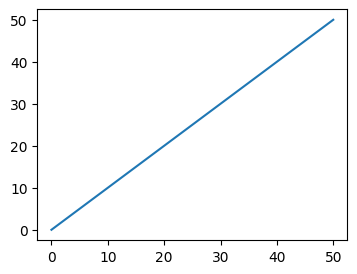

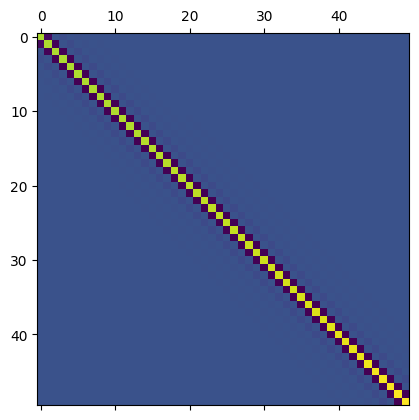

In [ ]:
# Schroeder 2.16

alpha=1 
#a = 15
b = 50
xmin = 0
xmax = b
dx = .001 

x = np.arange(xmin,xmax,dx)
V = alpha*x

plt.figure(figsize=(4,3))
plt.plot(x,V)
plt.show()

def psi_n(x,n,a):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

def E(n,a):
    return (n**2)*(np.pi**2)/(2*a**2)

num_functions = 50
h_matrix = np.zeros((num_functions,num_functions))

for i in range(num_functions):
    for j in range(num_functions):
        if i==j:
            h_matrix[i,j]=E(i+1,b)+np.trapz(np.conj(psi_n(x,i+1,b))*V*psi_n(x,j+1,b),x)
        else:
            h_matrix[i,j]=np.trapz(np.conj(psi_n(x,i+1,b))*V*psi_n(x,j+1,b),x)
        #print('i: ',i,' j: ',j,' h_ij: ',h_matrix[i,j])

       
plt.matshow(h_matrix)
plt.show()

Maybe bc vector acts different then arrays, the eigen vectors aren't folloing the correct order during sorting and looks like it's overwritting some data

In [ ]:
# automatic sorting/searching

def sort(x,v,y=100000):  
  """ rearrange array from small to large, 
  input x as abs(arry), v is the eigenvector, y is the boundary potential V (only if needed) """
  #x =abs(x) # should I do this here?
  
  for i in range(len(x)):
      small = 100000    # set/reset small as a large num
      holdv = np.zeros(len(v[0]))
    
      for j in range(i,len(x)): # find the smallest
          #print(j)
          if x[j] <= small:
            small = x[j]    # re-assign small, does not make change to the array yet
            holdv = v[[j]]    # holds the vector of the index j
            index = j # track the position of the smallest number for swapping once loop j ends
      #print(holdv)
      x[index] = x[i] # swap
      x[i] = small
      v[index] = v[i]
      v[i] = holdv
      #print(holdv)
      #print(index,'swap\n', v)

  # cut off unbounded states if needed
  for k in range(len(x)):
    if x[k] > y:
      x[k] = '0'  # what else can I assign it to ?
      v[k] = '0'

  return (x,v)


I added the code block below.

This is copied from my 2.16 problem example and sorts things correctly. I haven't looked carefully at your attempt to do the sort because it's way more complicated than it needs to be. Let me know if you need help understanding what I did.

[ 3  6 10 11 13 14 16 17 19 21 22 24 26 29 30 32 35 37 39 41 44 47 49 48
 46 45 43 42 40 38 36 34 33 31 28 27 25 23 20 18 15 12  9  8  7  5  4  2
  1  0]


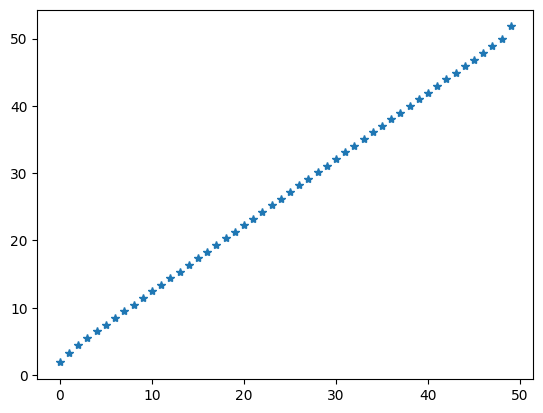

In [ ]:
values,vectors = np.linalg.eig(h_matrix)


# sort the values but keep functions aligned too
sort = np.argsort(values)
print(sort)

val = np.zeros_like(values)
vec = np.zeros_like(vectors)

for i in range(num_functions):
    val[i] = values[sort[i]]
    vec[:,i] = vectors[:,sort[i]]
    
plt.plot(val,'*')

I added the code block above

In [ ]:
""" # Testing sort
eg = np.array([5,3,7,1,4])
egg = np.array([[5,3,5,32,5,121],[433,34,34,35,53,33],[643,76,676,454,53,32],[3423,2,3,4,5,5],[343,35,7,87,2,0.6]])
print(eg)
print(egg,'\n\n')
EG, EGG = sort(eg,egg)

print(EG)
print(EGG)
"""

" # Testing sort\neg = np.array([5,3,7,1,4])\negg = np.array([[5,3,5,32,5,121],[433,34,34,35,53,33],[643,76,676,454,53,32],[3423,2,3,4,5,5],[343,35,7,87,2,0.6]])\nprint(eg)\nprint(egg,'\n\n')\nEG, EGG = sort(eg,egg)\n\nprint(EG)\nprint(EGG)\n"

In [ ]:
'''
values,vectors = np.linalg.eig(h_matrix)
print('unsorted eigenvalues\n',values[3])
print('\n',vectors[3])
Es,vec = sort(abs(values),vectors)
print('Es\n',Es[0])
print('vec\n',vec[0])
'''

"\nvalues,vectors = np.linalg.eig(h_matrix)\nprint('unsorted eigenvalues\n',values[3])\nprint('\n',vectors[3])\nEs,vec = sort(abs(values),vectors)\nprint('Es\n',Es[0])\nprint('vec\n',vec[0])\n"

In [ ]:
vec[:,0]

array([0.02887445, 0.05727728, 0.08475076, 0.11086407, 0.13522567,
       0.15749325, 0.17738266, 0.19467308, 0.20921148, 0.22091237,
       0.22975763, 0.23579126, 0.23911542, 0.23988134, 0.23828313,
       0.23454645, 0.22892185, 0.22167285, 0.21307042, 0.20338184,
       0.19286749, 0.18177121, 0.17032014, 0.15871671, 0.14714172,
       0.13574767, 0.12466475, 0.11399492, 0.10382052, 0.09419808,
       0.0851693 , 0.07675365, 0.06896158, 0.06178491, 0.05521253,
       0.04921742, 0.04377566, 0.0388486 , 0.03440659, 0.03040426,
       0.02681168, 0.02357879, 0.0206792 , 0.01805608, 0.01568897,
       0.01350255, 0.01148197, 0.00948224, 0.00747139, 0.00476043])

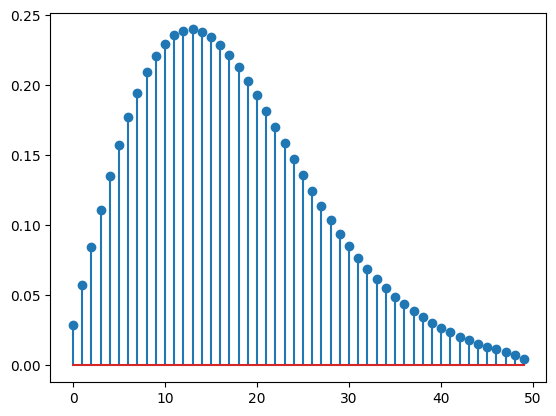

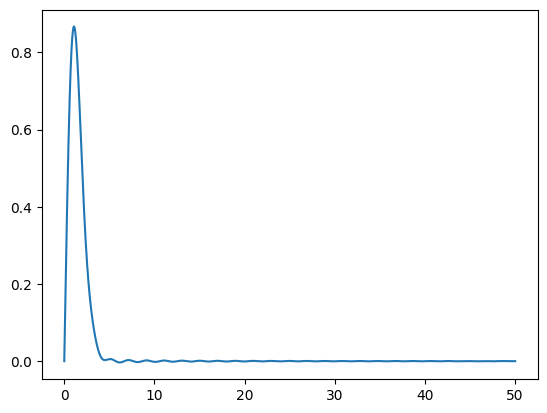

In [ ]:
plt.stem(vec[:,0])
plt.show()

psi = np.zeros_like(x)
for i in range(len(val)):
    psi += vec[i,0]*psi_n(x,i+1,b)

plt.plot(x,psi)
plt.show()

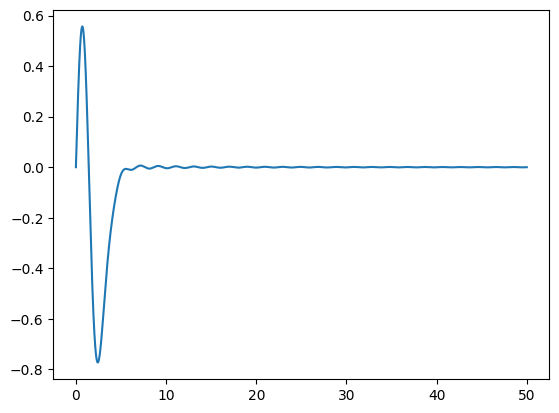

In [ ]:
psi = np.zeros_like(x)
for i in range(len(val)):
    psi += vec[i,1]*psi_n(x,i+1,b)
    
plt.plot(x,-1*psi)
plt.show()

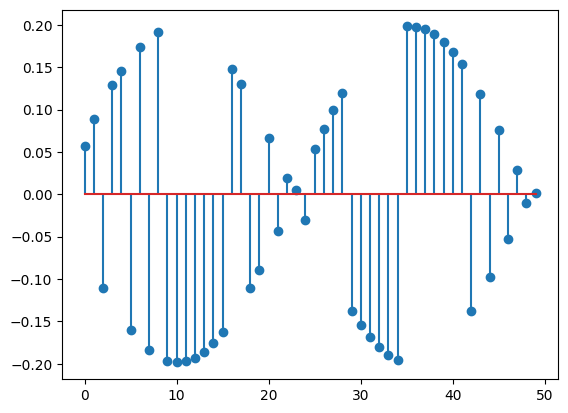

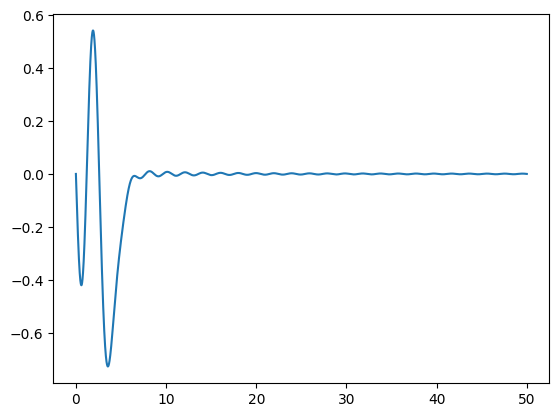

In [ ]:
plt.stem(vec[1])
plt.show()

psi = np.zeros_like(x)
for i in range(len(values)):
    psi += vec[i,2]*psi_n(x,i+1,b)
    
plt.plot(x,psi)
plt.show()

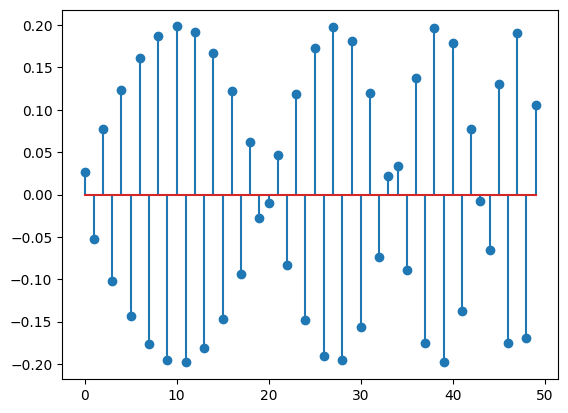

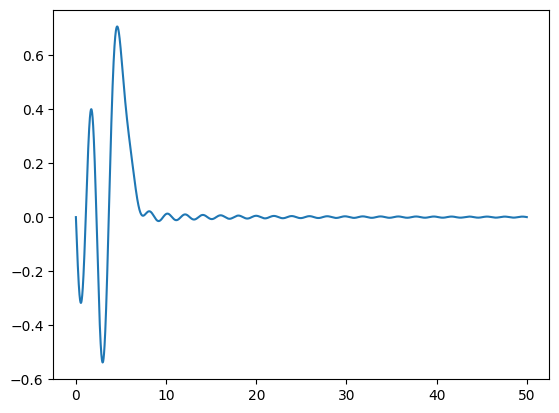

In [ ]:
plt.stem(vectors[:,4])
plt.show()

psi = np.zeros_like(x)
for i in range(len(values)):
    psi += vec[i,3]*psi_n(x,i+1,b)
    
plt.plot(x,psi)
plt.show()

In [ ]:
# Schroeder 2.18
'''
Compare Matrix Method with Shooting Method: the advantage of matrix methong is that it can run really fast and calculate all possible and impossible energy states all at once; 
the disadvantage being it's accuracy is not as good as shooting method.

I'll probably use matrix mathod to calculate the possibel energy states when accuracy is not critically important and the amount of data needed to be analyzed is large.
If we are intrested in soem specific ones, then I'll use the results from matrix method as the first guesses of the shooting method.


'''

"\nCompare Matrix Method with Shooting Method: the advantage of matrix methong is that it can run really fast and calculate all possible and impossible energy states all at once; \nthe disadvantage being it's accuracy is not as good as shooting method.\n\nI'll probably use matrix mathod to calculate the possibel energy states when accuracy is not critically important and the amount of data needed to be analyzed is large.\nIf we are intrested in soem specific ones, then I'll use the results from matrix method as the first guesses of the shooting method.\n\n\n"